# Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/Microsoft/mingliu_hkscs.ttf')

In [2]:
df = pd.read_csv('Ntu_Orders.csv')

In [3]:
columns = df.columns
print(columns)

Index(['SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift'],
      dtype='object')


In [4]:
df['SalesOrderSlaveDateTime'][0]

'2017-01-03 23:11:47.207'

In [5]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [6]:
df['Month'] = df.new_DateId.astype(str).apply(lambda x: x[:7])

In [7]:
#new_df = df.groupby(by=['Month', 'LevelOneCategoryName', 'LevelTwoCategoryName'])[['SalesOrderSlaveTotalPayment','Quantity']].sum()

new_df = df.groupby(by=['Month', 'LevelTwoCategoryName'])[['SalesOrderSlaveTotalPayment','Quantity']].sum()

In [8]:
print(new_df.columns)
for i in range(10):
    print(new_df.iloc[i])
print(len(new_df))


Index(['SalesOrderSlaveTotalPayment', 'Quantity'], dtype='object')
SalesOrderSlaveTotalPayment    154016.0
Quantity                         1056.0
Name: (2017-01, 內衣), dtype: float64
SalesOrderSlaveTotalPayment    15372786.0
Quantity                          63733.0
Name: (2017-01, 女裝), dtype: float64
SalesOrderSlaveTotalPayment    3222.0
Quantity                        597.0
Name: (2017-01, 指甲油、刷具、美材), dtype: float64
SalesOrderSlaveTotalPayment    2530.0
Quantity                         12.0
Name: (2017-01, 收納), dtype: float64
SalesOrderSlaveTotalPayment    11108.0
Quantity                          36.0
Name: (2017-01, 時尚女包), dtype: float64
SalesOrderSlaveTotalPayment    179.0
Quantity                         2.0
Name: (2017-01, 智慧型手機配件), dtype: float64
SalesOrderSlaveTotalPayment    2249.0
Quantity                          7.0
Name: (2017-01, 比基尼、泳裝、配件), dtype: float64
SalesOrderSlaveTotalPayment    77707.0
Quantity                         129.0
Name: (2017-01, 流行女鞋), dtype: float64


In [9]:
name_of_array = list()
array_ = list()
for i in range(len(new_df)):
    ele = new_df.iloc[i]
    if ele.name[1] not in name_of_array:
        name_of_array.append(ele.name[1])
        array_.append(np.zeros(12))
    index = name_of_array.index(ele.name[1])
    array_[index][int(ele.name[0][-2:])-1] = ele.SalesOrderSlaveTotalPayment
    

In [10]:
print(name_of_array)
print("size of name_of_array is %d" % len(name_of_array))
print("size of array_ is %d, %d" % (len(array_), array_[0].shape[0]))

['內衣', '女裝', '指甲油、刷具、美材', '收納', '時尚女包', '智慧型手機配件', '比基尼、泳裝、配件', '流行女鞋', '飾品、配件']
size of name_of_array is 9
size of array_ is 9, 12


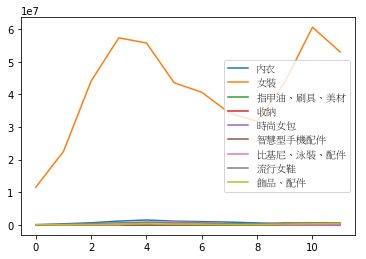

In [11]:
plt.figure()
for i in range(len(name_of_array)):
    plt.plot(array_[i], label=name_of_array[i])
plt.legend(prop=zhfont1)
plt.show()